## Iris Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])

In [3]:
pd.set_option('display.max_rows', 200)

### **1.1 Summary Statistics**

**First 5 elements of the data frame**

In [4]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Name          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Features in this dataset:**
1. Sepal Length - float
2. Sepal Width - float
3. Petal Length - float
4. Petal Width - float

**Statistical Summary for  each  numeric  feature  available  in  the  dataset**

In [6]:
df.agg(['mean','sum','max','min','std'])[['Sepal Length','Sepal Width','Petal Length','Petal Width']].transpose()

,mean,sum,max,min,std
Sepal Length,5.843333,876.5,7.9,4.3,0.828066
Sepal Width,3.054000,458.1,4.4,2.0,0.433594
Petal Length,3.758667,563.8,6.9,1.0,1.764420
Petal Width,1.198667,179.8,2.5,0.1,0.763161


In [7]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **1.2 Data Visualization**

**The below histograms are plots for each numeric feature in the dataset. A histogram provides a graphical representation of the distribution of the data. The histograms below have default number of bins.**

In [8]:
plt.figure(figsize = (10, 7)) 

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

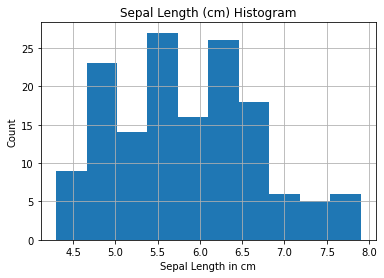

In [9]:
plt.title('Sepal Length (cm) Histogram')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Count')
df['Sepal Length'].hist()

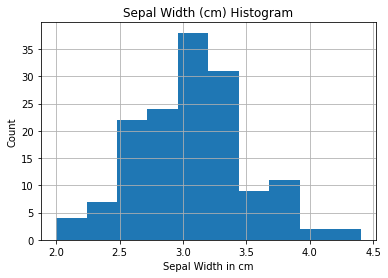

In [10]:
plt.title('Sepal Width (cm) Histogram')
plt.xlabel('Sepal Width in cm')
plt.ylabel('Count')
df['Sepal Width'].hist()

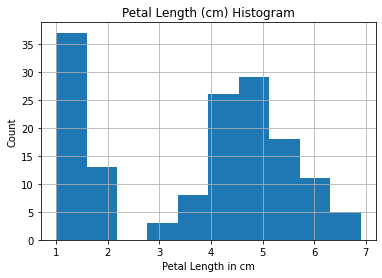

In [11]:
plt.title('Petal Length (cm) Histogram')
plt.xlabel('Petal Length in cm')
plt.ylabel('Count')
df['Petal Length'].hist()

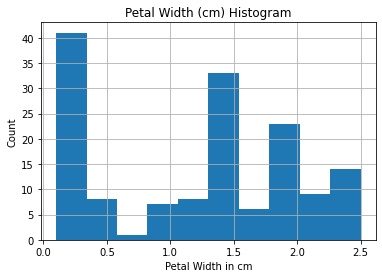

In [12]:
plt.title('Petal Width (cm) Histogram')
plt.xlabel('Petal Width in cm')
plt.ylabel('Count')
df['Petal Width'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd28fa0390>,
      dtype=object)

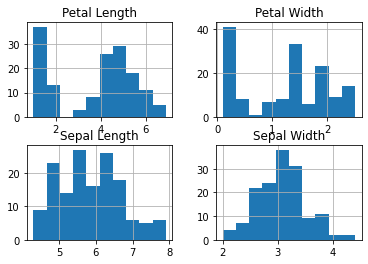

In [13]:
df.hist()

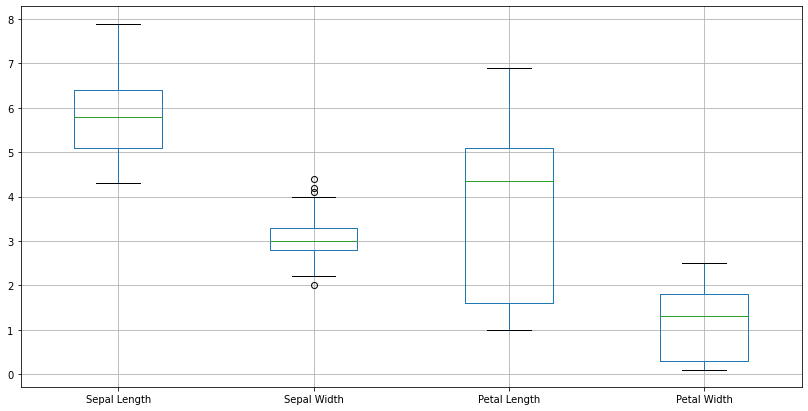

In [14]:
plt.figure(figsize=(14,7))
df.boxplot()

## **2. Ames, Iowa Housing Dataset**

In [15]:
import pandas as pd
import numpy as np
from sklearn import feature_selection, preprocessing
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', 200)

In [16]:
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt"
df_2 = pd.read_csv(url, sep="\t")

### **2.1 Imputation**

**Calculating the sum of all null values per category to identify all the missing features.**

In [17]:
len(df_2.columns[df_2.isnull().any()])

27

#### **Filling each nominal missing feature with the string "Missing" using the fillna method for all categories of type 'object'.**

**I saved all the 'object' type column headers under obj_cols in case I need it again for other manipulation.**

In [18]:
obj_cols = df_2.columns[df_2.dtypes == object]
df_2[obj_cols] = df_2[obj_cols].fillna("Missing")

Checking of the fillna worked:

In [19]:
df_2.isnull().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [20]:
df_2.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,189900


#### **Interpolating numeric missing feature with the string "Missing" using the fillna method for all categories of type 'number'.**

In [21]:
df_numeric_cols = df_2.select_dtypes(include=np.number).interpolate(method='linear')
df_numeric_cols.drop(df_numeric_cols.columns[[0,1]],inplace=True,axis=1)

**Checking of the interpolate worked:**

In [22]:
df_2.isnull().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical 

### **2.2 Standardization**

#### **Standard normally distribute each numeric feature, which results in a numpy array**

**'numeric_cols' refers to all categories that are of type 'number'**

In [23]:
standardized_df2 = preprocessing.scale(df_numeric_cols)
standardized_df2

array([[-0.87700484,  3.12874389,  2.74438073, ..., -0.44805744,
         1.678499  ,  0.42822875],
       [-0.87700484,  0.45972069,  0.18709726, ..., -0.07960156,
         1.678499  , -0.94895652],
       [-0.87700484,  0.50347517,  0.5228137 , ..., -0.07960156,
         1.678499  , -0.11012549],
       ...,
       [ 0.64771625, -0.32785993,  0.03719892, ...,  0.28885432,
        -1.36011828, -0.61092014],
       [-0.87700484,  0.32845726, -0.01750572, ..., -0.81651332,
        -1.36011828, -0.13516523],
       [ 0.06128506,  0.19719382, -0.06611797, ...,  1.76267783,
        -1.36011828,  0.09019236]])

**Converting the standardized numpy result to dataframe to plot a boxplot**

In [24]:
df_standardized_df_2 = pd.DataFrame(standardized_df2)
df_standardized_df_2.columns = df_numeric_cols.columns
df_standardized_df_2.tail()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
2925,0.530430,-1.421722,-0.280621,-0.067254,0.393091,0.418109,-0.012780,-0.570422,0.826581,-0.293918,-0.854144,-0.110031,-0.399561,-0.783185,-0.101005,-0.982723,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,-0.281684,-0.925143,0.263757,0.306990,0.536083,0.207758,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,-1.360118,-0.479462
2926,-0.877005,-0.874791,-0.160296,-0.776079,-0.506718,0.385040,-0.060726,-0.570422,-0.310665,1.621958,-0.728957,-0.425559,-0.657330,-0.783185,-0.101005,-1.182556,1.082555,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,0.224841,0.306990,0.052453,0.556024,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118,-0.623440
2927,0.647716,-0.327860,0.037199,-0.776079,-0.506718,0.682657,0.370789,-0.570422,-0.231629,-0.293918,0.035819,-0.316599,-0.483783,-0.783185,-0.101005,-1.048015,-0.822482,3.827447,-1.024793,-0.755203,0.176094,-0.207291,-0.281684,-0.925143,0.069178,-2.323071,-2.198288,-0.108848,-0.230221,-0.358838,-0.103134,-0.285354,-0.063031,1.146786,0.288854,-1.360118,-0.610920
2928,-0.877005,0.328457,-0.017506,-0.776079,-0.506718,0.087423,-0.444296,-0.570422,1.379836,0.433405,-0.829106,0.766182,0.585575,-0.783185,-0.101005,-0.219006,1.082555,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.281684,0.618518,-0.086485,0.306990,-0.254466,1.157576,-0.141295,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,-1.360118,-0.135165
2929,0.061285,0.197194,-0.066118,0.641571,-0.506718,0.715726,0.466681,-0.044064,0.692658,-0.293918,-0.731233,-0.125921,-0.417426,1.560842,-0.101005,0.989884,-0.822482,-0.249782,0.784028,1.234675,0.176094,-0.207291,1.625868,0.618518,0.613999,1.622021,0.824402,0.761818,0.006915,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,1.762678,-1.360118,0.090192


#### **Boxplot of all numeric features before standardization**

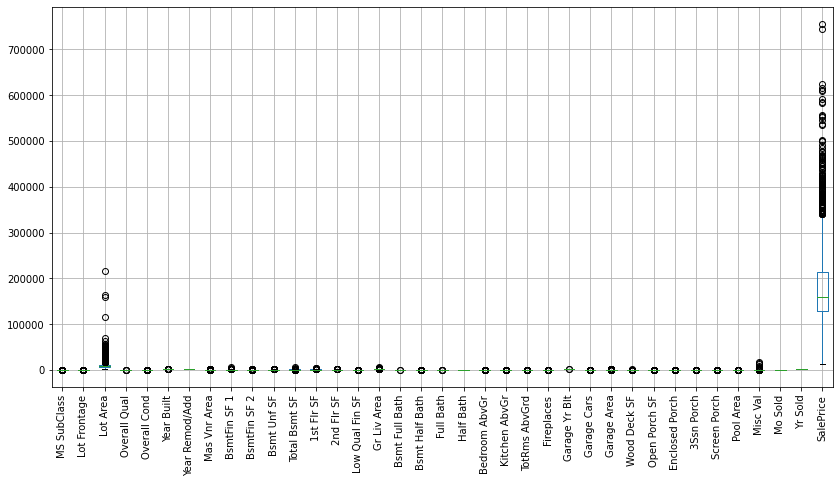

In [25]:
df_numeric_cols.boxplot(return_type='axes',figsize=(14,7),rot=90)

#### **Boxplot of all numeric features after standardization**

We can see some outliers even now, but we can also see the result of standardization. Explained further after graph.

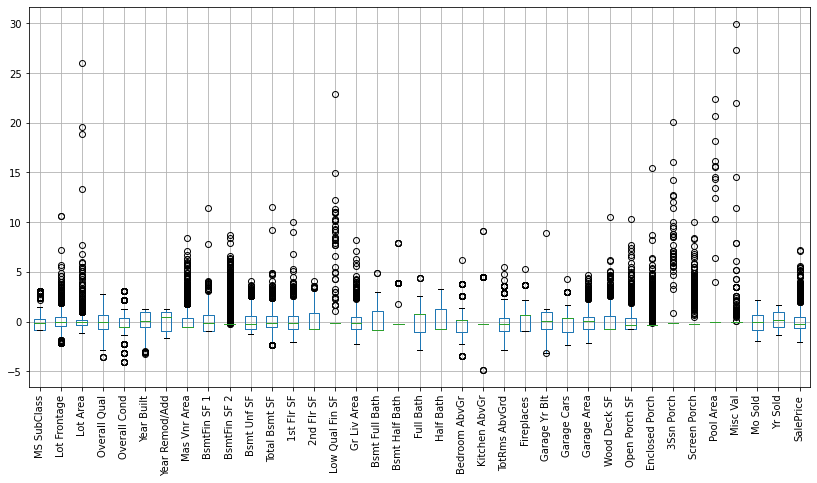

In [26]:
df_standardized_df_2.boxplot(return_type='axes', figsize=(14,7), rot=90)

We notice a significant improvement in placement of the values in the graph2 compared to graph1 where we can almost see no value properly, meaning they have now been standardized.

Sale Price has maximum outliers in un-standardized dataframe, Misc Val has maximum outliers in the standardized dataframe.

### **2.3 Feature Selection**

#### **Mutual information between numeric features and SalePrice**

In [27]:
df_standardized_df_2_updated = df_standardized_df_2.drop(columns='SalePrice')

In [28]:
mutual_info = feature_selection.mutual_info_regression(df_standardized_df_2_updated,df_standardized_df_2['SalePrice'])
mutual_info

array([0.29137221, 0.21045411, 0.16711859, 0.57479163, 0.13207923,
       0.40021642, 0.29726142, 0.17042962, 0.17848594, 0.00123891,
       0.11730962, 0.39082977, 0.36867412, 0.2016602 , 0.01570182,
       0.49389012, 0.04340111, 0.014373  , 0.25006366, 0.06025433,
       0.02340412, 0.03106021, 0.18596554, 0.17457504, 0.30064469,
       0.38110136, 0.41917687, 0.10944393, 0.16855502, 0.03222705,
       0.00404618, 0.02229913, 0.00707189, 0.01223387, 0.        ,
       0.03479326])

#### **Making a list of tuples to map column headers to mutual information array**

In [29]:
numeric_cols = list(df_numeric_cols.columns)

In [30]:
numeric_cols.remove('SalePrice')

In [31]:
len(mutual_info)

36

In [32]:
len(numeric_cols)

36

In [33]:
mutual_info_with_features = []
for i in range(len(mutual_info)):
    mutual_info_with_features.append((numeric_cols[i],mutual_info[i]))

In [34]:
mutual_info_with_features

[('MS SubClass', 0.2913722139312158),
 ('Lot Frontage', 0.21045411133536263),
 ('Lot Area', 0.16711859034554433),
 ('Overall Qual', 0.5747916326799949),
 ('Overall Cond', 0.13207923178952496),
 ('Year Built', 0.4002164241686499),
 ('Year Remod/Add', 0.2972614225844823),
 ('Mas Vnr Area', 0.17042961573463122),
 ('BsmtFin SF 1', 0.1784859351303365),
 ('BsmtFin SF 2', 0.001238913101018646),
 ('Bsmt Unf SF', 0.11730962208861762),
 ('Total Bsmt SF', 0.39082976881618947),
 ('1st Flr SF', 0.36867412236389985),
 ('2nd Flr SF', 0.20166019729362405),
 ('Low Qual Fin SF', 0.01570181731725806),
 ('Gr Liv Area', 0.4938901200894712),
 ('Bsmt Full Bath', 0.04340110786634144),
 ('Bsmt Half Bath', 0.014372998733263032),
 ('Full Bath', 0.25006365702203004),
 ('Half Bath', 0.06025433404245395),
 ('Bedroom AbvGr', 0.02340411790256436),
 ('Kitchen AbvGr', 0.031060206662633538),
 ('TotRms AbvGrd', 0.18596554138945098),
 ('Fireplaces', 0.17457504022668568),
 ('Garage Yr Blt', 0.30064469043944175),
 ('Garage 

#### **Method to sort the list of tuples**

In [35]:
def sort_mutual_info(tup):
    n = len(tup)
    for i in range(0,n):  
        for j in range(0,n - i - 1):  
            if (tup[j][1] > tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup  

#### **Top 5 numeric features ranked by mutual information**

In [36]:
sorted_mutual_info = sort_mutual_info(mutual_info_with_features)
top_5_sorted = sorted_mutual_info[-5:]
top_5_sorted[::-1]

[('Overall Qual', 0.5747916326799949),
 ('Gr Liv Area', 0.4938901200894712),
 ('Garage Area', 0.4191768691592941),
 ('Year Built', 0.4002164241686499),
 ('Total Bsmt SF', 0.39082976881618947)]

#### **How Sales Price changes wrt Overall Qual**

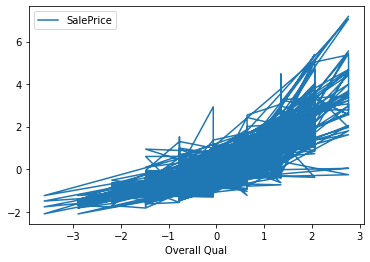

In [37]:
df_standardized_df_2.plot(x='Overall Qual',y='SalePrice')

As overall qual increases, the sales price also increases. This can be justified using the graph that's shown above which plots standardized values of sales price and overall qual.